# Exploratory Data Analysis

## Purpose:

There are a number of goals when it comes to exploratory data analysis when it concerns text data:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Read in data from prior work.

In [2]:
corpus = pd.read_pickle(r'C:\Users\philb\Repos\Thinkful_repo\projects\unsupervised_capstone\pickle\corpus.pkl')
doc_lyrics = pd.read_pickle(r'C:\Users\philb\Repos\Thinkful_repo\projects\unsupervised_capstone\pickle\stop_removed_lyrics.pkl')

In [3]:
corpus['stop_removed_lyrics'] = doc_lyrics

In [4]:
corpus.head()

,song,year,artist,genre,lyrics,song_len,language,stop_removed_lyrics
187884,lost-direction,2012,beecake,Rock,Im on this train again\nPassing points I've pa...,1267,en,train passing points passed thousand times wat...
223453,middle,2015,dj-snake,Hip-Hop,Staring at two different views on your window ...,857,en,staring different views window ledge coffee go...
63682,never-been-alive,2013,avett-brothers,Country,Money won't do the trick\nBut it will help to ...,446,en,money trick help open doors help turn things a...
213150,love,2010,ester-dean,Hip-Hop,Our love suicide\nOur love suicide\nOur love s...,2709,en,suicide suicide suicide ah suicide killing get...
82159,get-em-up,2010,cypress-hill,Hip-Hop,"Who wants the wrath, it must be the hood\nWho'...",1857,en,wants wrath hood whos good wishes reason blast...


In [5]:
corpus['artist_neat'] = corpus.artist.apply(lambda x: ' '.join([word.title() for word in x.split('-')]))

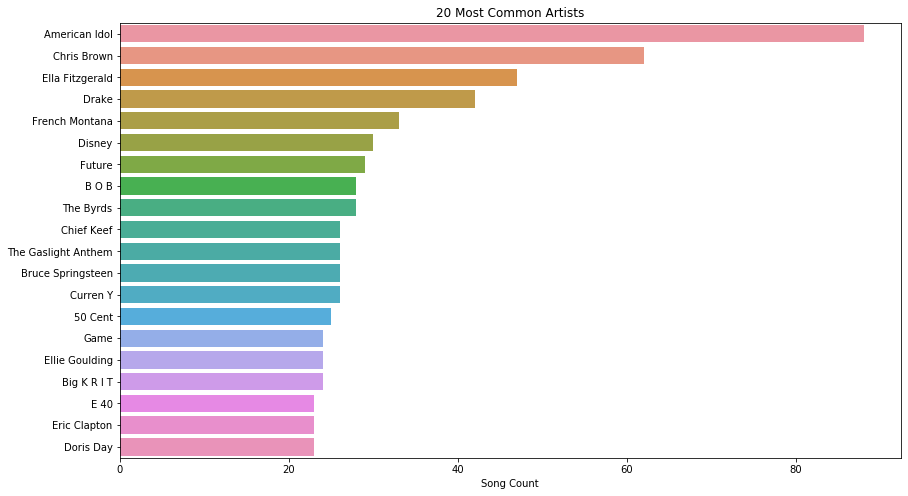

In [6]:
common_20_artists = corpus.artist_neat.value_counts().head(20)

plt.figure(figsize=(14,8))
sns.barplot(x=common_20_artists.values, y=common_20_artists.index)
plt.title('20 Most Common Artists')
plt.xlabel('Song Count')
plt.show()

Are these artists' lyrics representative of lyrics in general?

In [7]:
corpus.artist.value_counts(1)

american-idol          0.0088
chris-brown            0.0062
ella-fitzgerald        0.0047
drake                  0.0042
french-montana         0.0033
                        ...  
charles-ray            0.0001
cate-le-bon            0.0001
breathe-owl-breathe    0.0001
bones                  0.0001
dave-alvin             0.0001
Name: artist, Length: 3251, dtype: float64

Consider limiting amount of songs allowed by an artist to avoid power of a single artist over results?

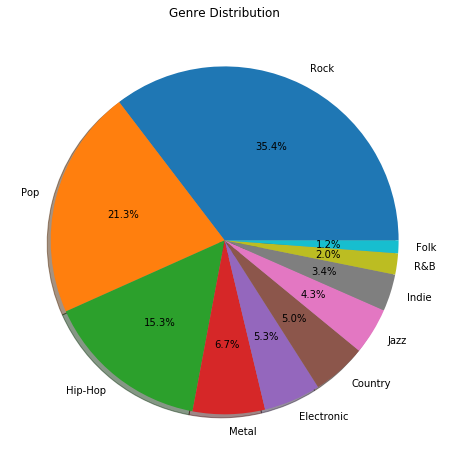

In [8]:
most_common_genres = corpus.genre.value_counts()

plt.figure(figsize=(14,8))
plt.pie(most_common_genres, labels=most_common_genres.index, autopct='%1.1f%%', shadow=True)
plt.title('Genre Distribution')
plt.show()

Is this the breakdown of genres in music in general? Do genres have a big effect on the kinds of lyrics in a song?

In [9]:
corpus['stop_removed_lyrics_word_count'] = corpus.stop_removed_lyrics.apply(lambda x: len(x.split()))

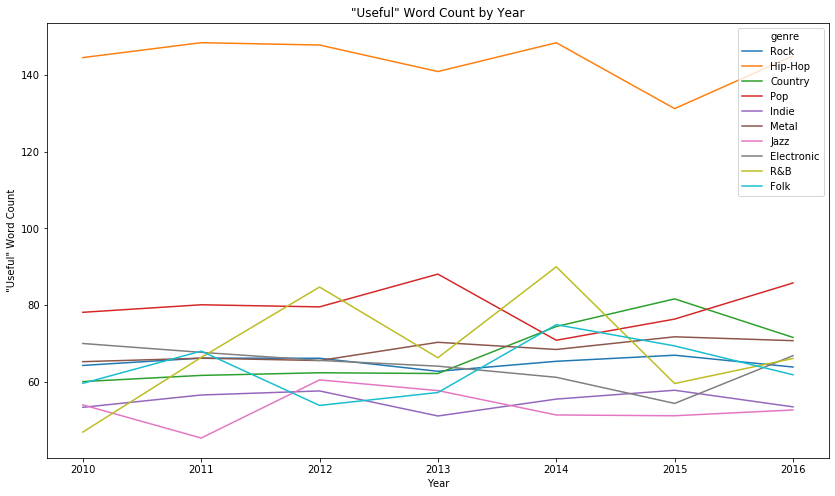

In [15]:
plt.figure(figsize=(14,8))

sns.lineplot(x='year', y='stop_removed_lyrics_word_count', hue='genre', data=corpus, ci=None)
plt.title('"Useful" Word Count by Year')
plt.ylabel('"Useful" Word Count')
plt.xlabel('Year')
plt.show()